<a href="https://colab.research.google.com/github/gabrielcan/ModeloDeDatosDiabetesPima/blob/main/ModeloDiabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descripción del Dataset: **Pima Indians Diabetes Database**

El **Pima Indians Diabetes Database** es un conjunto de datos utilizado para predecir la presencia de diabetes en individuos basándose en diversos factores médicos y de salud. Este dataset contiene información recopilada de mujeres de la comunidad indígena Pima, un grupo con una alta prevalencia de diabetes tipo 2. Los datos han sido utilizados ampliamente en estudios de aprendizaje automático y análisis de datos debido a su relevancia y la claridad de su propósito.



# Objetivo del Dataset

El objetivo principal del dataset es predecir la probabilidad de que una persona desarrolle diabetes tipo 2, utilizando características biométricas y de salud. La variable objetivo (**Outcome**), la cual indica si una persona tiene diabetes (**1**) o no (**0**), es la clave para el modelo de predicción. Las demás características se consideran como variables predictoras o **features**.


# Descripción de los Campos del **Pima Indians Diabetes Database**

### 1. **Pregnancies**
- **Descripción:** Número de veces que la persona ha estado embarazada.  
- **Límite Normal:** No tiene un "límite" específico, pero un número más alto podría reflejar un mayor riesgo asociado con complicaciones en embarazos previos, especialmente en mujeres de edad avanzada.

### 2. **Glucose**
- **Descripción:** Nivel de glucosa en plasma a las 2 horas en una prueba de tolerancia a la glucosa (mg/dL).  
- **Límite Normal:**  
  - **Normal:** Menos de 140 mg/dL.  
  - **Prediabetes (Intolerancia a la glucosa):** 140-199 mg/dL.  
  - **Diabetes:** 200 mg/dL o más.  
  Este valor es clave para identificar la capacidad del cuerpo para metabolizar la glucosa y es uno de los principales indicadores de riesgo de diabetes.

### 3. **BloodPressure**
- **Descripción:** Presión arterial diastólica (mm Hg), que es la presión en las arterias cuando el corazón está en reposo entre latidos.  
- **Límite Normal:**  
  - **Normal:** Menos de 80 mm Hg.  
  - **Hipertensión (nivel 1):** 80-89 mm Hg.  
  - **Hipertensión (nivel 2):** 90 mm Hg o más.  
  Un valor elevado puede ser un factor de riesgo importante para enfermedades cardiovasculares y diabetes.

### 4. **SkinThickness**
- **Descripción:** Grosor del pliegue cutáneo en el triceps (mm).  
- **Límite Normal:** Depende del contexto y de la población específica, pero generalmente valores bajos pueden estar asociados con una mala nutrición, mientras que un valor muy alto podría indicar obesidad.

### 5. **Insulin**
- **Descripción:** Concentración de insulina en plasma a las 2 horas en una prueba de tolerancia a la glucosa (mu U/ml).  
- **Límite Normal:**  
  - **Normal:** Entre 2-25 µU/mL.  
  Un valor elevado podría indicar resistencia a la insulina, lo cual es un factor de riesgo para diabetes tipo 2.

### 6. **BMI (Body Mass Index)**
- **Descripción:** Índice de masa corporal, calculado como el peso en kilogramos dividido entre el cuadrado de la altura en metros.  
- **Límite Normal:**  
  - **Bajo peso:** Menos de 18.5.  
  - **Normal:** 18.5-24.9.  
  - **Sobrepeso:** 25-29.9.  
  - **Obesidad:** 30 o más.  
  Un índice de masa corporal elevado está fuertemente asociado con un mayor riesgo de desarrollar diabetes tipo 2.

### 7. **DiabetesPedigreeFunction**
- **Descripción:** Medida de la predisposición genética a la diabetes, calculada a partir de antecedentes familiares y otros factores.  
- **Límite Normal:** No tiene un "límite" fijo, pero valores más altos indican una mayor predisposición genética al riesgo de diabetes.

### 8. **Age**
- **Descripción:** Edad de la persona en años.  
- **Límite Normal:** No tiene un límite "normal", aunque el riesgo de diabetes tipo 2 aumenta con la edad, especialmente después de los 45 años.

### 9. **Outcome**
- **Descripción:** Variable binaria que indica si la persona tiene diabetes (1) o no (0).  



#Objetivos para éste analisis Inicial

- **Visualizar las relaciones entre las variables para ver como se comportan.**
- **Poder manejar los campos Nan de una forma eficiente**
- **Identificar las variables más importantes para predecir la diabetes.**

#Planteamiento del Problema

Para poder realizar este analisis, primero debemos cargar el dataset, luego realizar un análisis exploratorio de datos para identificar los valores perdidos y las variables más importantes para predecir la diabetes y poder encontrar las relaciones entre ellas.

#Pasos a seguir

- **Cargar el dataset y verificar que esté bien cargado.**
- **Verificar la cantidad de valores perdidos en las columnas seleccionadas.**
- **Reemplazar los valores 0 en las columnas seleccionadas con NaN.**
- **Obtener la edad promedio de los 5 registros con valores NaN en la columna "Age" y reemplazarlos en los 5 campos ("Glucose") con el valor promedio calculado.**
- **Generar un Gráfico con 1 variable**
- **Generar un Gráfico con 2 variables**
- **Generar un Gráfico con mas de 2 variables**



In [2]:
#Importamos librerias
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
from datetime import datetime, timedelta

In [41]:
#Cargamos el archivo que vamos a analizar si estamos con el CSV en el mismo lugar que tenemos el archivo ".ipynb"
#df=pd.read_csv('diabetes.csv')

#Usamos la Url de GitHub para cargar el dataset

df=pd.read_csv('https://raw.githubusercontent.com/gabrielcan/ModeloDeDatosDiabetesPima/refs/heads/main/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Con el comando "describe()", obtenemos rápidamente esto mostrará el resumen estadístico de todas las columnas numéricas en el dataframe.

In [42]:
df.describe().round(1) #agregamos round(1) para redondear en un decimal los resultados.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0
mean,3.8,120.9,69.1,20.5,79.8,32.0,0.5,33.2,0.3
std,3.4,32.0,19.4,16.0,115.2,7.9,0.3,11.8,0.5
min,0.0,0.0,0.0,0.0,0.0,0.0,0.1,21.0,0.0
25%,1.0,99.0,62.0,0.0,0.0,27.3,0.2,24.0,0.0
50%,3.0,117.0,72.0,23.0,30.5,32.0,0.4,29.0,0.0
75%,6.0,140.2,80.0,32.0,127.2,36.6,0.6,41.0,1.0
max,17.0,199.0,122.0,99.0,846.0,67.1,2.4,81.0,1.0


#Se observan muchas columnas con valores minimos de 0 lo cual tiene poco sentido practico como por ejemplo en los siguientes campos:

    1. Concentracion de plasma de glucosa (Glucose)
    2. Presion arterial diastolica en mm Hg (BloodPressure).
    3. Grosor de piel en triceps en mm (SkinThickness).
    4. Nivel de Insulina (Insulin).
    5. BMI Indice de masa corporal (BMI).


Ahora con info(), observamos la cantidad de null que tenemos en cada columna y el tipo de datos

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Contamos la cantidad de 0 (ceros) que tienen en cada una de las columnas seleccionadas

In [44]:
nun_missing = (df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] == 0).sum()
print(nun_missing)

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


Remplazamos los valores con 0 por el valor "nan" en cada una de las columnas seleccionadas.

In [45]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.nan)

print(df.isnull().sum()) #Contamos los valores "nan" y mostramos la cantidad en cada columna

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


#Nos centramos primero en la columna "Glucose" del DF y mostramos los registros con valor "nan"

In [46]:
dfnanGlucose=df[df.Glucose.isna()]
dfnanGlucose

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,NaN,48.0,20.0,NaN,24.7,0.140,22,0
182,1,NaN,74.0,20.0,23.0,27.7,0.299,21,0
342,1,NaN,68.0,35.0,NaN,32.0,0.389,22,0
349,5,NaN,80.0,32.0,NaN,41.0,0.346,37,1
502,6,NaN,68.0,41.0,NaN,39.0,0.727,41,1


#Guardamos en una variable los index de los campos que tienen "nan" en campo "Glucose"

In [47]:
indexValoresNanGlucose=list(dfnanGlucose.index)
print(indexValoresNanGlucose)

[75, 182, 342, 349, 502]


#Obtenemos 5 valores con NaN en el campo "Glucose".
#Nos parece que es factible remplazar los valores "nan", por un promedio en el campo "Glucose". Pero dicho promedio lo queremos armar considerando los siguientes puntos:
  
1.   Tomar de los 5 registros que tienen "nana", el campo "Age" (Edad) y sacar  
un promedio de la edades.
2.   Hacemos lo mismos con el campo BMI (indice de masa muscular) y el campo "Bloodpressure" (Presion arterial).
3. Teniendo estos 3 promedios (Age, BMI y Bloodpressure), realizaremos lo siguiente:
  - buscaremos en el DF original, la edad promedio que obtuvimos, la cual la vamos a redondear en 0 decimales para obtener un número entero.
  - con los registros que obtuvimos con la edad promedio, tomaremos solo los que esten dentro del "BMI" promedio que obtuvimos anteriormente, dejando un margen de -5 y +5.
  - por último, con los registros resultantes hacemos un último filtro en el campo "Bloodpressure", usando el valor promedio que obtuvimso en el calculo del punto 2 dejando tambien un margen de -3 y +3.
4. Realizado ya los tres pasos anteriores y con los registros resultantes, avanzaremos en sacar el promedio del campo "Glucose". Valor que usaremos para remplazar los "nan" en dicha columna.  

Hacemos el punto 1 y 2, es decir que sacaremos el promedio de los campos "Age","BMI" y "Bloodpressure"

In [48]:
valorGlucosaNa=df[df.Glucose.isna()] #obtenemos un df que contiene solo los registros con valores "nan" en la columna "Glucose"
valorMedioAge=valorGlucosaNa.Age.mean().round(0) #Sacamos el promedio del campo "Age" usando el df "valorGlucosaNa", redondeando en 0
valorMedioBmi=valorGlucosaNa.BMI.mean().round(0) #Sacamos el promedio del campo "BMI" usando el df "valorGlucosaNa", redondeando en 0
valorMedioBloodpressure=valorGlucosaNa.BloodPressure.mean().round(0) #Sacamos el promedio del campo "Bloodpressure" usando el df "valorGlucosaNa", redondeando en 0

print("Valor Medio BMI: ",valorMedioBmi) #Mostramos el resultado Promedio BMI
print("Valor Medio Age: ",valorMedioAge) #Mostramos el resultado Promedio Age
print("Valor Medio Bloodpressure: ",valorMedioBloodpressure) #Mostramos el resultado Promedio Bloodpressure

Valor Medio BMI:  33.0
Valor Medio Age:  29.0
Valor Medio Bloodpressure:  68.0


#Obtenemos un proemdio de 29 en el campo Edad, 33 como BMI y 68 de Presion Arterial entre los 5 registros con valor NaN en "Glucose".

Ahora, generamos un DataFrame que solo contenga los registros donde "Age" es igual a 29, "BMI" es igual a 33 (+-5) y "BloodPressure" es 68 (+-3)

In [49]:
# Generamos un DataFrame que solo contiene los registros donde "Age" es igual a 29, "BMI" es igual a 33 (+-5) y "BloodPressure" es 68 (+-3)
dfConAge29yConsireaciones = df[(df['Age'] == valorMedioAge) & (df['BMI'] >= valorMedioBmi-5) & (df['BMI'] <= valorMedioBmi+5)&(df['BloodPressure'] >= valorMedioBloodpressure-3) & (df['BloodPressure'] <= valorMedioBloodpressure+3)]

#Mostramos el dataframe Resultante
print("Mostramos DF que cumple con las condiciones indicadas: \n\n",dfConAge29yConsireaciones)




Mostramos DF que cumple con las condiciones indicadas: 

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
168            4    110.0           66.0            NaN      NaN  31.9   
171            6    134.0           70.0           23.0    130.0  35.4   
233            4    122.0           68.0            NaN      NaN  35.0   
296            2    146.0           70.0           38.0    360.0  28.0   

     DiabetesPedigreeFunction  Age  Outcome  
168                     0.471   29        0  
171                     0.542   29        1  
233                     0.394   29        0  
296                     0.337   29        1  


In [50]:
# Calculamos la media de los valores de la columna "Glucose" para los registros que cumplen estas condiciones
valorGlucosaAvg29Age = dfConAge29yConsireaciones['Glucose'].mean()

# Mostramos el valor promedio que obtuvimos
print("\n\n Valor promedio del campo 'Glucose': ",valorGlucosaAvg29Age)




 Valor promedio del campo 'Glucose':  128.0


Reemplazamos los valores NaN en el campo "Glucose" con la media que obtuvimos (128), de los registros que tienen 29 en el campo "Age" y cumplen con las consideraciones de BMI y BloodPressure.

In [51]:
df.Glucose=df.Glucose.fillna(valorGlucosaAvg29Age) #Remplazamos los campos nan del campo "Glucose" por el valor obtenido en la variable "valorGlucosaAvg29Age"


Verifciamos que no tengamos valores NaN en el campo "Glucosa"

In [52]:
df[df.Glucose.isna()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


Confirmamos que los cambios se efectuaron de manera correcta en el campo "Glucose" del DF original.

In [53]:
#Mostramos los valores para confirmar que los valores cambiaron,
#usando la variable que contiene el index de los registros que estaban como "NaN" en el campo "Glucose".

df.loc[indexValoresNanGlucose]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,128.0,48.0,20.0,NaN,24.7,0.140,22,0
182,1,128.0,74.0,20.0,23.0,27.7,0.299,21,0
342,1,128.0,68.0,35.0,NaN,32.0,0.389,22,0
349,5,128.0,80.0,32.0,NaN,41.0,0.346,37,1
502,6,128.0,68.0,41.0,NaN,39.0,0.727,41,1


Observamos los valores "NaN" que tenemos en el campo "BIM"

In [54]:
df[df.BMI.isna()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1
49,7,105.0,NaN,NaN,NaN,NaN,0.305,24,0
60,2,84.0,NaN,NaN,NaN,NaN,0.304,21,0
81,2,74.0,NaN,NaN,NaN,NaN,0.102,22,0
145,0,102.0,75.0,23.0,NaN,NaN,0.572,21,0
371,0,118.0,64.0,23.0,89.0,NaN,1.731,21,0
426,0,94.0,NaN,NaN,NaN,NaN,0.256,25,0
494,3,80.0,NaN,NaN,NaN,NaN,0.174,22,0
522,6,114.0,NaN,NaN,NaN,NaN,0.189,26,0
684,5,136.0,82.0,NaN,NaN,NaN,0.640,69,0


Verificamos que tenemos 11 registros con "NaN".

Mostramos el df con los registros "NaN" en el campo "BMI".

In [55]:
dfConRegNaNenBMI=df[df.BMI.isna()]
dfConRegNaNenBMI

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1
49,7,105.0,NaN,NaN,NaN,NaN,0.305,24,0
60,2,84.0,NaN,NaN,NaN,NaN,0.304,21,0
81,2,74.0,NaN,NaN,NaN,NaN,0.102,22,0
145,0,102.0,75.0,23.0,NaN,NaN,0.572,21,0
371,0,118.0,64.0,23.0,89.0,NaN,1.731,21,0
426,0,94.0,NaN,NaN,NaN,NaN,0.256,25,0
494,3,80.0,NaN,NaN,NaN,NaN,0.174,22,0
522,6,114.0,NaN,NaN,NaN,NaN,0.189,26,0
684,5,136.0,82.0,NaN,NaN,NaN,0.640,69,0


Contamos los registros "NaN" que tenemos en el campo "BMI"

In [56]:
print("Cantidad de regitros con NaN en el campo 'BMI': ",dfConRegNaNenBMI['BMI'].isnull().sum())

Cantidad de regitros con NaN en el campo 'BMI':  11


Mostramos los Valores "NaN" del campo "BloodPressure"

In [57]:
dfConRegNaNenBloodPressure=df[df.BloodPressure.isna()]
dfConRegNaNenBloodPressure

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
15,7,100.0,NaN,NaN,NaN,30.0,0.484,32,1
49,7,105.0,NaN,NaN,NaN,NaN,0.305,24,0
60,2,84.0,NaN,NaN,NaN,NaN,0.304,21,0
78,0,131.0,NaN,NaN,NaN,43.2,0.270,26,1
81,2,74.0,NaN,NaN,NaN,NaN,0.102,22,0
172,2,87.0,NaN,23.0,NaN,28.9,0.773,25,0
193,11,135.0,NaN,NaN,NaN,52.3,0.578,40,1
222,7,119.0,NaN,NaN,NaN,25.2,0.209,37,0
261,3,141.0,NaN,NaN,NaN,30.0,0.761,27,1


Contamos los registros "NaN" que tenemos en el campo "BloodPressure"

In [58]:
print("Cantidad de regitros con NaN en el campo 'BloodPressure': ",dfConRegNaNenBloodPressure['BloodPressure'].isnull().sum())

Cantidad de regitros con NaN en el campo 'BloodPressure':  35


# Observamos que, tenemos varios registros que tienen entre 2 o mas valores "NaN"

Esta situación, nos lleva pensar que, si tenemos filas que tienen mas de 2 columnas con valores NaN, su recontrucción puede generar que alteremos los resultados o veamos valores incoherentes. Por tal motivo, tomaremos los campos claves de 'BloodPressure', 'SkinThickness' y 'BMI', los cuales considereamos que son útiles para el analisis, pero si mas 2 de éstas columnas estan con valores "NaN" en la misma fila, directamente lo eliminaremos.

In [59]:
# Definimos las columnas que vamos a considerar para la condición de NaN
columnas_de_interes = ['BloodPressure', 'SkinThickness','BMI']

# Eliminar filas donde 3 o más columnas tengan NaN
df_limpio = df[df[columnas_de_interes].isna().sum(axis=1) < 2]

# Mostrar el DataFrame limpio
print(df_limpio)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0      NaN  33.6   
1              1     85.0           66.0           29.0      NaN  26.6   
2              8    183.0           64.0            NaN      NaN  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0      NaN  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0            NaN      NaN  30.1   
767            1     93.0           70.0           31.0      NaN  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

Campo "BloodPressure" mostramos los registros con valores "NaN" que tiene el mísmo.

In [60]:
df_limpio[df_limpio.BloodPressure.isna()]



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
172,2,87.0,NaN,23.0,NaN,28.9,0.773,25,0
357,13,129.0,NaN,30.0,NaN,39.9,0.569,44,1


Guardamos en la variable "indexValoresNanBloodPressure" el valor del index de los 2 campos que tenemos con valor "NaN".

In [61]:
indexValoresNanBloodPressure=list(df_limpio[df_limpio['BloodPressure'].isna()].index)
print(indexValoresNanBloodPressure) #Mostramos el valor de los index

[172, 357]


#Tenemos 2 campos que estan con "NaN" en el campo "BloodPressure".
Consideraciones en éstos campos:

1. Uno es con diabetes y el otro es sin diabetes.
2. Tienen edades muy diferentes (25 y 44 años respectivamente).
3. El BMI (indice de masa corportal) son muy desiguales.

Por estos puntos que mencione, es que vamos a tomar cada caso de manera particular.



# Veremos primero el registro con que tiene el valor 44 en el campo "Age"

Lo que vamos a hacer, para poder agregar un valor coherente en el campo "BloodPressure", sera lo siguiente:

*   Buscaremos en el Df con el que estamos trabajando (df_limpio), registros que tengan en el campo "Age" un valor de 44.
*   Luego, vamos a traer solo los registros que tengan en el campo "Outcome" el valor 1 (Con diabetes).



In [62]:
df_Age44_Diabetes=df_limpio[(df_limpio['Age']==44)&(df_limpio['Outcome']==1)]

df_Age44_Diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
254,12,92.0,62.0,7.0,258.0,27.6,0.926,44,1
337,5,115.0,76.0,NaN,NaN,31.2,0.343,44,1
357,13,129.0,NaN,30.0,NaN,39.9,0.569,44,1
592,3,132.0,80.0,NaN,NaN,34.4,0.402,44,1
691,13,158.0,114.0,NaN,NaN,42.3,0.257,44,1


Sacamos el promedio de "BloodPressure", usando "df_Age44_Diabetes" creado con los filtros de "Age" y "Outcome".

Guardaremos en una variable (v_PromBloodPressure) el resultado que obtenemos.

In [63]:
v_PromBloodPressure=df_Age44_Diabetes['BloodPressure'].mean().round(0) #Redondeamos con 0 decimales
print(v_PromBloodPressure) #Mostramos el resultado

83.0


Ahora, vamos a modificar el campo "BloodPressure", con el valor promedio que obtuvimos en el paso anterior, en la fila que corresponde al "NaN" que tiene el valor 44 en el campo "Age".


In [64]:
df_limpio.loc[(df_limpio['BloodPressure'].isna()) & (df_limpio['Age'] == 44), 'BloodPressure'] = v_PromBloodPressure

Mostramos el registro que esta quedando con "NaN" en el campo "BloodPressure".

In [65]:
df_limpio[df_limpio.BloodPressure.isna()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
172,2,87.0,NaN,23.0,NaN,28.9,0.773,25,0


# Ahora trabajaremos con el segundo registro que tiene el valor 25 en el campo Age

En éste caso, realizaremos los siguientes filtros:
* Campo Outcome con el valor 0, porque no tiene Diabetes
* Campo Age con el valor 25
* El BMI del registro es de 28.9, lo cual podemos usar como referencia, es decir, no tiene mucho sentido que filtremos por edad y que tengamos casos con un BMI de 20 o 35, para emparejar ésta siutacion, en el DF que crearemos, vamos a tomar un rango de 29,9 +-4.



In [66]:
df_Age25_SinDiabetes=df_limpio[(df_limpio['Age']==25)&(df_limpio['Outcome']==0)&(df_limpio['BMI']>=28.9-4)&(df_limpio['BMI']<=28.9+4)] #creasmo un df que contenga los registros que cumplan con las 2 condiciones que pusimos
df_Age25_SinDiabetes #Mostramos el DF unuevo

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
172,2,87.0,NaN,23.0,NaN,28.9,0.773,25,0
210,2,81.0,60.0,22.0,NaN,27.7,0.290,25,0
257,2,114.0,68.0,22.0,NaN,28.7,0.092,25,0
313,3,113.0,50.0,10.0,85.0,29.5,0.626,25,0
331,2,87.0,58.0,16.0,52.0,32.7,0.166,25,0
383,1,90.0,62.0,18.0,59.0,25.1,1.268,25,0
395,2,127.0,58.0,24.0,275.0,27.7,1.600,25,0
497,2,81.0,72.0,15.0,76.0,30.1,0.547,25,0
520,2,68.0,70.0,32.0,66.0,25.0,0.187,25,0
551,3,84.0,68.0,30.0,106.0,31.9,0.591,25,0


Sacamos el promedio del campo "BloodPressure" y lo mostramos.

In [67]:
v_PromBloodPressure25Ages = df_Age25_SinDiabetes.BloodPressure.mean().round(0)
print(v_PromBloodPressure25Ages) #Mostramos el valor promedio que obtenemos

62.0


Ahora, nos queda modificar el campo "BloodPressure", con el valor promedio que obtuvimos en el paso anterior, en la fila que corresponde al "NaN" que tiene el valor 25 en el campo "Age", en el "df_limpio".

In [68]:
df_limpio.loc[(df_limpio['BloodPressure'].isna()) & (df_limpio['Age'] == 25), 'BloodPressure'] = v_PromBloodPressure25Ages

Mostramos usando el valor del "index", que guardamos en la variable "indexValoresNanBloodPressure", de los registros que estaban con "NaN" en el campo "BloodPressure"

De este modo, podemos confirmar que los cambios se hicieron exitosamente, en ambos regitros.

In [69]:
df_limpio.iloc[indexValoresNanBloodPressure]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
179,5,130.0,82.0,NaN,NaN,39.1,0.956,37,1
373,2,105.0,58.0,40.0,94.0,34.9,0.225,25,0


Apuntamos nuevamente el "df_limpio" a "df".

Reseteamos el index del df

mostramos el df

In [70]:
df=df_limpio
df.reset_index(drop=True, inplace=True)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
728,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
729,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
730,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
731,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


#Generamos el df "df_NaN_Skinthickness", donde tendremos los registros "NaN" del campo "SkinThickness".

# Y mostramos el df

In [77]:
df_NaN_Skinthickness = df_limpio[df_limpio.SkinThickness.isna()]
df_NaN_Skinthickness

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
8,4,110.0,92.0,NaN,NaN,37.6,0.191,30,0
9,10,168.0,74.0,NaN,NaN,38.0,0.537,34,1
10,10,139.0,80.0,NaN,NaN,27.1,1.441,57,0
...,...,...,...,...,...,...,...,...,...
722,0,123.0,72.0,NaN,NaN,36.3,0.258,52,1
723,1,106.0,76.0,NaN,NaN,37.5,0.197,26,0
724,6,190.0,92.0,NaN,NaN,35.5,0.278,66,1
727,9,89.0,62.0,NaN,NaN,22.5,0.142,33,0


Guardamos en la variable "indexValoresNanSkinthickness" el valor del index, de los campos "NaN" que mostramos anteriormente.

In [76]:
indexValoresNanSkinthickness=list(df_NaN_Skinthickness[df_NaN_Skinthickness['SkinThickness'].isna()].index)
print(indexValoresNanSkinthickness) #Mostramos el valor de los index

[2, 5, 8, 9, 10, 14, 18, 19, 23, 26, 30, 33, 38, 41, 43, 54, 56, 57, 59, 62, 67, 71, 77, 83, 86, 93, 94, 95, 97, 99, 106, 108, 109, 110, 116, 117, 122, 124, 131, 133, 136, 141, 144, 147, 157, 160, 161, 163, 169, 171, 172, 173, 176, 177, 183, 185, 188, 193, 199, 211, 213, 217, 221, 224, 226, 230, 233, 237, 241, 242, 254, 257, 260, 262, 266, 268, 271, 272, 282, 287, 290, 291, 304, 306, 314, 319, 322, 324, 328, 329, 334, 335, 338, 339, 345, 347, 350, 362, 375, 378, 382, 384, 385, 388, 390, 391, 392, 402, 415, 418, 420, 424, 432, 436, 441, 444, 452, 453, 467, 472, 473, 482, 486, 489, 490, 494, 495, 499, 500, 505, 507, 510, 511, 526, 531, 533, 534, 538, 544, 545, 551, 552, 557, 560, 561, 565, 569, 571, 586, 587, 592, 594, 596, 597, 598, 600, 602, 604, 605, 606, 611, 612, 622, 627, 629, 643, 644, 645, 646, 647, 652, 654, 658, 659, 662, 666, 673, 679, 689, 693, 694, 696, 699, 704, 708, 714, 715, 722, 723, 724, 727, 731]


Contamos la cantidad de registros que tenemos en el df "df_NaN_Skinthickness".

In [80]:
print("Cantidad de Registros NaN, en el campo Skinthickness: ",df_NaN_Skinthickness['SkinThickness'].isnull().sum())

Cantidad de Registros NaN, en el campo Skinthickness:  192


In [81]:
df_NaN_Skinthickness.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,192.000000,192.000000,192.000000,0.0,0.0,192.000000,192.000000,192.000000,192.000000
mean,4.833333,124.244792,74.880208,NaN,NaN,31.294792,0.396625,38.161458,0.375000
std,3.321094,30.001701,12.265015,NaN,NaN,6.791585,0.282210,13.052049,0.485389
min,0.000000,44.000000,48.000000,NaN,NaN,18.200000,0.078000,21.000000,0.000000
25%,2.000000,105.000000,66.000000,NaN,NaN,25.975000,0.204750,27.000000,0.000000
50%,5.000000,122.000000,74.000000,NaN,NaN,31.050000,0.287000,36.000000,0.000000
75%,7.000000,142.250000,80.500000,NaN,NaN,35.150000,0.536250,46.000000,1.000000
max,13.000000,197.000000,122.000000,NaN,NaN,52.900000,1.781000,69.000000,1.000000


In [87]:
df_NaN_Skinthickness.Outcome.value_counts()

,count
Outcome,
0,120
1,72


Mostramos el df que generamos, realizando los filtros en el campo "Age" y "*Outcome*"

In [94]:
df_SinDiabetesMenor32Age = df_NaN_Skinthickness[(df_NaN_Skinthickness['Age'] < 32) & (df_NaN_Skinthickness['Outcome'] == 0)]
df_SinDiabetesMenor32Age

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
8,4,110.0,92.0,NaN,NaN,37.6,0.191,30,0
30,6,92.0,92.0,NaN,NaN,19.9,0.188,28,0
43,1,146.0,56.0,NaN,NaN,29.7,0.564,29,0
83,1,80.0,55.0,NaN,NaN,19.1,0.258,21,0
94,1,151.0,60.0,NaN,NaN,26.1,0.179,22,0
95,0,125.0,96.0,NaN,NaN,22.5,0.262,21,0
97,2,85.0,65.0,NaN,NaN,39.6,0.930,27,0
99,1,96.0,122.0,NaN,NaN,22.4,0.207,27,0
106,4,76.0,62.0,NaN,NaN,34.0,0.391,25,0


Guardamos el valor del index de los campos que analizaremos con los filtros planteados.

In [111]:
index_part1_SkinThickness=list(df_SinDiabetesMenor32Age.index)
print(index_part1_SkinThickness) #Mostramos lista de Index

[5, 8, 30, 43, 83, 94, 95, 97, 99, 106, 110, 131, 161, 176, 183, 188, 193, 217, 224, 230, 242, 257, 334, 335, 338, 382, 391, 402, 415, 418, 420, 441, 453, 473, 490, 500, 505, 507, 538, 545, 561, 586, 587, 594, 596, 597, 602, 604, 611, 622, 646, 654, 662, 666, 693, 694, 723]


Con la funcion describe(), analizaremos los valores estadisticos de la muestra, que nos permitiran decidir como completar esta primera parte del DF para valores nulos en el campo "SkinThickness"

In [97]:
df_SinDiabetesMenor32Age.describe().round(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,57.0,57.0,57.0,0.0,0.0,57.0,57.0,57.0,57.0
mean,2.5,109.7,71.2,NaN,NaN,29.1,0.4,25.7,0.0
std,2.1,21.6,13.8,NaN,NaN,6.8,0.2,3.3,0.0
min,0.0,71.0,48.0,NaN,NaN,18.2,0.1,21.0,0.0
25%,1.0,92.0,62.0,NaN,NaN,24.3,0.2,22.0,0.0
50%,2.0,108.0,68.0,NaN,NaN,27.3,0.3,26.0,0.0
75%,4.0,125.0,78.0,NaN,NaN,33.7,0.5,29.0,0.0
max,10.0,175.0,122.0,NaN,NaN,45.3,0.9,31.0,0.0


En base a los datos estadisticos que obtenemos con describe(), decidimos para ésta parte que filtramos del df "df_SinDiabetesMenor32Age", tomar de la siguiente manera los datos que nos permitira obtener un valor para completar el campo "SkinThickness":

1. Tomaremos la media del campo "Age" (26 años, redondeando), es decir, valores menores a 26 en dicho campo.
2. La medía del campo "BMI" +-2 (entre 27 a 29 el BMI)
3. Del campo "BloodPressure", tomaremos la mediana y la media, para abarcar de manera más amplia sin llegar a los extremos que muestra el campo en Min y Max y considereando que son casos que no tienen diabetes.
4. De Glucose, tomare la mediana, para evitar valores extremos, porque tengo mucha distancia entre el Min y Max.
5. Campo "Outcome" igual a 0 (no tienen diabetes)

In [113]:
#Realizamos el filtro en el DF "df_limpio" y guardamos el resultado el nuevo df en la variable "df_SkinThickness_Parte1"

df_SkinThickness_Parte1= df_limpio[(df_limpio['Age']<26)&(df_limpio['BMI']>=27)&(df_limpio['BMI']<=29)&(df_limpio['BloodPressure']<=71)&(df_limpio['Glucose']>=108)&(df_limpio['Outcome']==0)]
df_SkinThickness_Parte1 #Mostramos el Df resultante

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
98,1,126.0,56.0,29.0,152.0,28.7,0.801,21,0
248,2,114.0,68.0,22.0,NaN,28.7,0.092,25,0
331,1,139.0,46.0,19.0,83.0,28.7,0.654,22,0
379,2,127.0,58.0,24.0,275.0,27.7,1.600,25,0
453,4,114.0,64.0,NaN,NaN,28.9,0.126,24,0
484,1,130.0,60.0,23.0,170.0,28.6,0.692,21,0
524,1,116.0,70.0,28.0,NaN,27.4,0.204,21,0
707,1,109.0,58.0,18.0,116.0,28.5,0.219,22,0


Calculamos la media del campo "SkinThickness", el valor obtenido lo gaurdaremos en la variable "valarSkinThickness_Parte1", por ultimo mostramos el resultado.

In [124]:
valarSkinThickness_Parte1=df_SkinThickness_Parte1['SkinThickness'].mean().round(0)
print("Valor medio del campo SkinThickness en df_SkinThickness_Parte1 es : ",valarSkinThickness_Parte1)

Valor medio del campo SkinThickness en df_SkinThickness_Parte1 es :  23.0


Procedemos a modificar el campo "SkinThickness" del "df_limpio", por el valor guardado en "valarSkinThickness_Parte1", usando como parametro la lista de index que guardamos del df "df_SinDiabetesMenor32Age".

In [115]:
df_limpio.loc[index_part1_SkinThickness, 'SkinThickness'] = valarSkinThickness_Parte1

Mostramos los registros que modificamos para poder confirmar los cambios.

In [116]:
df_limpio.iloc[index_part1_SkinThickness]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
5,5,116.0,74.0,23.0,NaN,25.6,0.201,30,0
8,4,110.0,92.0,23.0,NaN,37.6,0.191,30,0
30,6,92.0,92.0,23.0,NaN,19.9,0.188,28,0
43,1,146.0,56.0,23.0,NaN,29.7,0.564,29,0
83,1,80.0,55.0,23.0,NaN,19.1,0.258,21,0
94,1,151.0,60.0,23.0,NaN,26.1,0.179,22,0
95,0,125.0,96.0,23.0,NaN,22.5,0.262,21,0
97,2,85.0,65.0,23.0,NaN,39.6,0.930,27,0
99,1,96.0,122.0,23.0,NaN,22.4,0.207,27,0
106,4,76.0,62.0,23.0,NaN,34.0,0.391,25,0


#Mostramos el df que generamos, realizando los filtros en el campo "Age" y "*Outcome*" para poder obtener los registros que necesitamos separar.

In [117]:
df_SinDiabetesMay32Age = df_NaN_Skinthickness[(df_NaN_Skinthickness['Age'] > 32) & (df_NaN_Skinthickness['Outcome'] == 0)]
df_SinDiabetesMay32Age

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
10,10,139.0,80.0,NaN,NaN,27.1,1.441,57,0
18,8,99.0,84.0,NaN,NaN,35.4,0.388,50,0
26,5,117.0,92.0,NaN,NaN,34.1,0.337,38,0
33,11,138.0,76.0,NaN,NaN,33.2,0.420,35,0
38,7,133.0,84.0,NaN,NaN,40.2,0.696,37,0
...,...,...,...,...,...,...,...,...,...
643,8,91.0,82.0,NaN,NaN,35.6,0.587,68,0
658,8,107.0,80.0,NaN,NaN,24.6,0.856,34,0
689,1,111.0,94.0,NaN,NaN,32.8,0.265,45,0
699,2,105.0,75.0,NaN,NaN,23.3,0.560,53,0


Guardamos en la variable "index_part2_SkinThickness", el valor de los index de los registros que obtenemos en "df_SinDiabetesMay32Age"

In [119]:
index_part2_SkinThickness=list(df_SinDiabetesMay32Age.index)
print(index_part2_SkinThickness) #Mostramos lista de Index

[10, 18, 26, 33, 38, 41, 54, 57, 62, 71, 116, 133, 141, 144, 160, 169, 171, 177, 237, 241, 260, 262, 266, 282, 287, 291, 314, 319, 328, 329, 345, 385, 436, 444, 452, 467, 472, 482, 486, 489, 494, 495, 510, 511, 526, 531, 533, 544, 552, 557, 569, 592, 598, 606, 627, 629, 643, 658, 689, 699, 727]


Usamos la función describe() para obtener los datos estadisticos del df "df_SinDiabetesMay32Age"

In [118]:
df_SinDiabetesMay32Age.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,61.000000,61.000000,61.000000,0.0,0.0,61.00000,61.000000,61.000000,61.0
mean,6.311475,118.606557,76.245902,NaN,NaN,30.27377,0.422164,48.262295,0.0
std,3.423161,30.803830,11.017646,NaN,NaN,6.23824,0.339439,10.943646,0.0
min,0.000000,44.000000,50.000000,NaN,NaN,21.00000,0.137000,33.000000,0.0
25%,4.000000,104.000000,70.000000,NaN,NaN,25.00000,0.207000,39.000000,0.0
50%,6.000000,117.000000,76.000000,NaN,NaN,29.60000,0.270000,46.000000,0.0
75%,9.000000,137.000000,82.000000,NaN,NaN,34.20000,0.551000,57.000000,0.0
max,13.000000,194.000000,106.000000,NaN,NaN,45.30000,1.781000,69.000000,0.0


En base a los datos estadisticos que obtenemos con describe(), decidimos para ésta parte 2, que filtramos del df "df_SinDiabetesMay32Age", tomar de la siguiente manera los datos que nos permitira obtener un valor para completar el campo "SkinThickness":

1. Tomaremos la media del campo "Age" (48 años, redondeando), es decir, valores menores a 48 en dicho campo.
2. La medía del campo "BMI" +-4 (entre 26 a 34 el BMI)
3. Del campo "BloodPressure", tomaremos la media (menor 76)
4. De Glucose, tomare la mediana, para evitar valores extremos, porque tengo mucha distancia entre el Min y Max (117).
5. Campo "Outcome" igual a 0 (no tienen diabetes)

#Realizamos el filtro en el DF "df_limpio" y guardamos el resultado el nuevo df en la variable "df_SkinThickness_Parte2"


In [120]:
df_SkinThickness_Parte2= df_limpio[(df_limpio['Age']<48)&(df_limpio['BMI']>=26)&(df_limpio['BMI']<=34)&(df_limpio['BloodPressure']<=76)&(df_limpio['Glucose']>=117)&(df_limpio['Outcome']==0)]
df_SkinThickness_Parte2 #Mostramos el Df resultante

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
33,11,138.0,76.0,NaN,NaN,33.2,0.420,35,0
37,3,180.0,64.0,25.0,70.0,34.0,0.271,26,0
41,7,159.0,64.0,NaN,NaN,27.4,0.294,40,0
43,1,146.0,56.0,23.0,NaN,29.7,0.564,29,0
66,5,139.0,64.0,35.0,140.0,28.6,0.411,26,0
88,6,144.0,72.0,27.0,228.0,33.9,0.255,40,0
94,1,151.0,60.0,23.0,NaN,26.1,0.179,22,0
98,1,126.0,56.0,29.0,152.0,28.7,0.801,21,0
100,4,144.0,58.0,28.0,140.0,29.5,0.287,37,0
120,1,118.0,58.0,36.0,94.0,33.3,0.261,23,0


Guardamos en la variable "valorSkinThickness_Parte2", el valor de la media del campo "SkinThickness" del DF "df_SkinThickness_Parte2".

Luego Mostramos el resultado.

In [123]:
valorSkinThickness_Parte2=df_SkinThickness_Parte2['SkinThickness'].mean().round(0)
print("Valor medio del campo SkinThickness en df_SkinThickness_Parte2 es : ",valorSkinThickness_Parte2)

Valor medio del campo SkinThickness en df_SkinThickness_Parte2 es :  26.0


Modificamos en el DF "df_limpio" el campo "SkinThickness" con el valor que guardamos en la variable "valorSkinThickness_Parte2", tomando como referencia el valor del index que guardamos como lista en la variable "index_part2_SkinThickness"

In [125]:
df_limpio.loc[index_part2_SkinThickness, 'SkinThickness'] = valorSkinThickness_Parte2

Ahora para controlar, utilizando la lista de valores de index (index_part2_SkinThickness) mostramos los registros modificados, para confirmar el cambio.

In [126]:
df_limpio.iloc[index_part2_SkinThickness]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
10,10,139.0,80.0,26.0,NaN,27.1,1.441,57,0
18,8,99.0,84.0,26.0,NaN,35.4,0.388,50,0
26,5,117.0,92.0,26.0,NaN,34.1,0.337,38,0
33,11,138.0,76.0,26.0,NaN,33.2,0.420,35,0
38,7,133.0,84.0,26.0,NaN,40.2,0.696,37,0
...,...,...,...,...,...,...,...,...,...
643,8,91.0,82.0,26.0,NaN,35.6,0.587,68,0
658,8,107.0,80.0,26.0,NaN,24.6,0.856,34,0
689,1,111.0,94.0,26.0,NaN,32.8,0.265,45,0
699,2,105.0,75.0,26.0,NaN,23.3,0.560,53,0


In [128]:
df_ConDiabetes_Skinthickness = df_NaN_Skinthickness[(df_NaN_Skinthickness['Outcome'] == 1)]
df_ConDiabetes_Skinthickness

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
9,10,168.0,74.0,NaN,NaN,38.0,0.537,34,1
14,7,107.0,74.0,NaN,NaN,29.6,0.254,31,1
19,7,196.0,90.0,NaN,NaN,39.8,0.451,41,1
23,7,147.0,76.0,NaN,NaN,39.4,0.257,43,1
...,...,...,...,...,...,...,...,...,...
714,6,162.0,62.0,NaN,NaN,24.3,0.178,50,1
715,4,136.0,70.0,NaN,NaN,31.2,1.182,22,1
722,0,123.0,72.0,NaN,NaN,36.3,0.258,52,1
724,6,190.0,92.0,NaN,NaN,35.5,0.278,66,1


#Guardamos los valores del index en la variable "index_SkinThicknessConDiabetes"

In [154]:
index_SkinThicknessConDiabetes=list(df_ConDiabetes_Skinthickness.index)
print(index_SkinThicknessConDiabetes) #Mostramos lista de Index

[2, 9, 14, 19, 23, 56, 59, 67, 77, 86, 93, 108, 109, 117, 122, 124, 136, 147, 157, 163, 172, 185, 199, 211, 213, 221, 226, 233, 254, 268, 271, 272, 290, 304, 306, 322, 324, 339, 347, 350, 362, 375, 378, 384, 388, 390, 392, 424, 432, 499, 534, 551, 560, 565, 571, 600, 605, 612, 644, 645, 647, 652, 659, 673, 696, 704, 708, 714, 715, 722, 724, 731]


Observamos los valores estadisticos del DF "df_ConDiabetes_Skinthickness"

In [130]:
df_ConDiabetes_Skinthickness.describe().round(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,72.0,72.0,72.0,0.0,0.0,72.0,72.0,72.0,72.0
mean,5.4,141.4,76.6,NaN,NaN,34.1,0.4,39.6,1.0
std,3.1,27.0,11.7,NaN,NaN,6.4,0.3,11.6,0.0
min,0.0,95.0,52.0,NaN,NaN,23.3,0.1,21.0,1.0
25%,4.0,120.8,70.0,NaN,NaN,30.4,0.2,31.0,1.0
50%,5.0,136.5,74.5,NaN,NaN,32.8,0.3,39.0,1.0
75%,7.2,162.0,82.5,NaN,NaN,37.9,0.5,45.2,1.0
max,13.0,197.0,114.0,NaN,NaN,52.9,1.2,67.0,1.0


#Realizaremos el Calculo del CV (Coeficiente de variación), para interpretar si a media es representativa y poder usarla para el filtro del DF.

# formula:

# CV = (std / media)*100

Interpretación del CV (según rangos comunes en estadística):

* CV < 20%: Generalmente indica una buena homogeneidad en los datos. En este rango, la desviación estándar es baja en relación con la media, lo cual significa que los valores están agrupados y que la media es una medida confiable.

* 20% ≤ CV < 40%: Los datos muestran moderada heterogeneidad. Aquí, la media sigue siendo representativa, pero se debe tener más precaución, ya que los datos presentan mayor dispersión.

* CV ≥ 40%: Indica alta heterogeneidad, lo que sugiere que la desviación estándar es alta en comparación con la media. En estos casos, la media no es necesariamente una representación adecuada del conjunto de datos.

In [142]:
CV_BMI = round(((6.4/34.1)*100),1)
print("CV del campo BMI es: ",CV_BMI)

CV del campo BMI es:  18.8


In [144]:
CV_Presion=round((11.7/76.6)*100,1)
print("CV del campo BloodPressure es: ",CV_Presion)

CV del campo BMI es:  15.3


In [145]:
CV_Glucosa = round((27.0/141.4)*100,1)
print("CV del campo Glucose es: ",CV_Glucosa)

CV del campo BMI es:  19.1


In [146]:
CV_Age = round((11.6/39.6)*100,1)
print("CV del campo Age es: ",CV_Age)

CV del campo BMI es:  29.3


Luego de realizar los calculos de CV (Coeficiente de variación), obtenemos las siguientes conclusiones:
1. Podemos tomar la media de los campos "BMI", "Glucose" y "BloodPressure", porque en los 3 casos el valor de CV, fue menor al 20% y si nos guiamos de los rangos comunes de estadísticas, la medía estaria siendo representativa del total de valores.
Sin embargo, solo tomaremos los valores de Glucose y BMI, a causa de que si tenemos que tomar los 3 valores no encontramos coincidencias en el DF y entendemos que la glucosa y el BMI son campos claves para identificar la diabetes.
2. Lo que vamos hacer con los valores del punto anterior es tomar un (+/-) 4 en los dos casos.
3. NO podemos tomar la media de la edad, porque el CV es mayor al 20%.
  por tal motivo, tomaremos el valor del Q3, el cual nos dice que el 75% de los valores estan por debajo de 45 años. No tomamos la mediana porque practicamente es el mismo valor que la media.

In [152]:
df_SkinThickness_ConDiabetes= df_limpio[(df_limpio['Age']<45)&(df_limpio['BMI']<34.1)&(df_limpio['Glucose']>137.4)&(df_limpio['Glucose']<145.4)&(df_limpio['Outcome']==1)]
df_SkinThickness_ConDiabetes #Mostramos el Df resultante

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
182,5,139.0,80.0,35.0,160.0,31.6,0.361,25,1
233,3,139.0,54.0,NaN,NaN,25.6,0.402,22,1
288,2,144.0,58.0,33.0,135.0,31.6,0.422,25,1
663,7,142.0,90.0,24.0,480.0,30.4,0.128,43,1


Calculamos la media del campos "SkinThickness" del DF "df_SkinThickness_ConDiabetes"

In [153]:
valorSkinThicknessConDiabetes = df_SkinThickness_ConDiabetes['SkinThickness'].mean().round(0)
print("Valor medio del campo SkinThickness en df_SkinThickness_ConDiabetes es : ",valorSkinThicknessConDiabetes)

Valor medio del campo SkinThickness en df_SkinThickness_ConDiabetes es :  31.0


Efectuamos la modificacion en el campo "SkinThickness" del Df "df_limpio", usando la media que obtuvimos en el paso anterior.

In [155]:
df_limpio.loc[index_SkinThicknessConDiabetes, 'SkinThickness'] = valorSkinThicknessConDiabetes

Confirmamos los cambios en los registros que tenían "NaN", para ello usamos la lista de valores que contiene el index de los registros.

In [156]:
df_limpio.iloc[index_SkinThicknessConDiabetes]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183.0,64.0,31.0,NaN,23.3,0.672,32,1
9,10,168.0,74.0,31.0,NaN,38.0,0.537,34,1
14,7,107.0,74.0,31.0,NaN,29.6,0.254,31,1
19,7,196.0,90.0,31.0,NaN,39.8,0.451,41,1
23,7,147.0,76.0,31.0,NaN,39.4,0.257,43,1
...,...,...,...,...,...,...,...,...,...
714,6,162.0,62.0,31.0,NaN,24.3,0.178,50,1
715,4,136.0,70.0,31.0,NaN,31.2,1.182,22,1
722,0,123.0,72.0,31.0,NaN,36.3,0.258,52,1
724,6,190.0,92.0,31.0,NaN,35.5,0.278,66,1


In [157]:
df=df_limpio
df.reset_index(drop=True, inplace=True)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,31.0,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
728,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
729,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
730,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
731,1,126.0,60.0,31.0,NaN,30.1,0.349,47,1


Varificamos los valores unicos que tiene el campo "Outcome", el cual indica si el registro pertenece o no a una persona con diabetes.

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 731 entries, 0 to 732
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               731 non-null    int64   
 1   Glucose                   731 non-null    float64 
 2   BloodPressure             731 non-null    float64 
 3   SkinThickness             729 non-null    float64 
 4   Insulin                   393 non-null    float64 
 5   BMI                       731 non-null    float64 
 6   DiabetesPedigreeFunction  731 non-null    float64 
 7   Age                       731 non-null    int64   
 8   Outcome                   731 non-null    int64   
 9   Age_Group                 731 non-null    category
 10  Resul_Group               731 non-null    object  
dtypes: category(1), float64(6), int64(3), object(1)
memory usage: 63.9+ KB


Observamos que el campo "BMI" tiene 2 registros "NaN", en éste caso, vamos a eliminar los 2 registros

In [170]:
# Identificar los índices que cumplen la condición
indices_a_eliminar = df.loc[df['BMI'].isna()].index

# Eliminar los registros basados en los índices
df.drop(indices_a_eliminar, inplace=True)

# Verificar que los registros fueron eliminados
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0      NaN  33.6   
1              1     85.0           66.0           29.0      NaN  26.6   
2              8    183.0           64.0           31.0      NaN  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
728           10    101.0           76.0           48.0    180.0  32.9   
729            2    122.0           70.0           27.0      NaN  36.8   
730            5    121.0           72.0           23.0    112.0  26.2   
731            1    126.0           60.0           31.0      NaN  30.1   
732            1     93.0           70.0           31.0      NaN  30.4   

     DiabetesPedigreeFunction  Age  Outcome Age_Group   Resul_Group  
0                       0.627   50       

<ipython-input-170-26356aceaa65>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(indices_a_eliminar, inplace=True)


Comprobamos que el campo "BMI", ya no tiene valores "NaN"

In [173]:
df[df['BMI'].isna()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Group,Resul_Group


Revisamos los valores estadisticos que tenemos en el df.

In [176]:
df.describe().round(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,731.0,731.0,731.0,729.0,393.0,731.0,731.0,731.0,731.0
mean,3.9,121.9,72.4,28.6,155.7,32.5,0.5,33.3,0.3
std,3.4,30.6,12.4,9.2,118.9,6.9,0.3,11.7,0.5
min,0.0,44.0,24.0,7.0,14.0,18.2,0.1,21.0,0.0
25%,1.0,100.0,64.0,23.0,76.0,27.5,0.2,24.0,0.0
50%,3.0,117.0,72.0,28.0,125.0,32.4,0.4,29.0,0.0
75%,6.0,141.0,80.0,33.0,190.0,36.6,0.6,41.0,1.0
max,17.0,199.0,122.0,99.0,846.0,67.1,2.4,81.0,1.0


Tomamos el campo "Unique" y vemos los valore unicos que tiene, éste campo es la bandera que nos indica los casos que tienen diabetes (1) o NO (0).

In [177]:
df.Outcome.unique()

array([1, 0])

Contamos la cantidad de veces que aparece cada valor en la columna Outcome del DataFrame (df)

In [178]:
df.Outcome.value_counts()

,count
Outcome,
0,479
1,252


#Con los el resultado que obtuvimos con los valores del campos "Outcome", sabemos que el 65% (479 con valor 0) de las personas estudiadas en el dataframe no tienen diabetes.

Ahora observamos la frecuencia que existe por el campo "Age" (edades), usando una grafica de barras, donde agrupamos las edades y categorizamos por el campo "Outcome".




<ipython-input-209-6780c9feb1d3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labelsEdad, right=False)
<ipython-input-209-6780c9feb1d3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BMI_Group'] = pd.cut(df['BMI'], bins=binsBMI, labels=labelsBMI, right=False)
<ipython-input-209-6780c9feb1d3>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

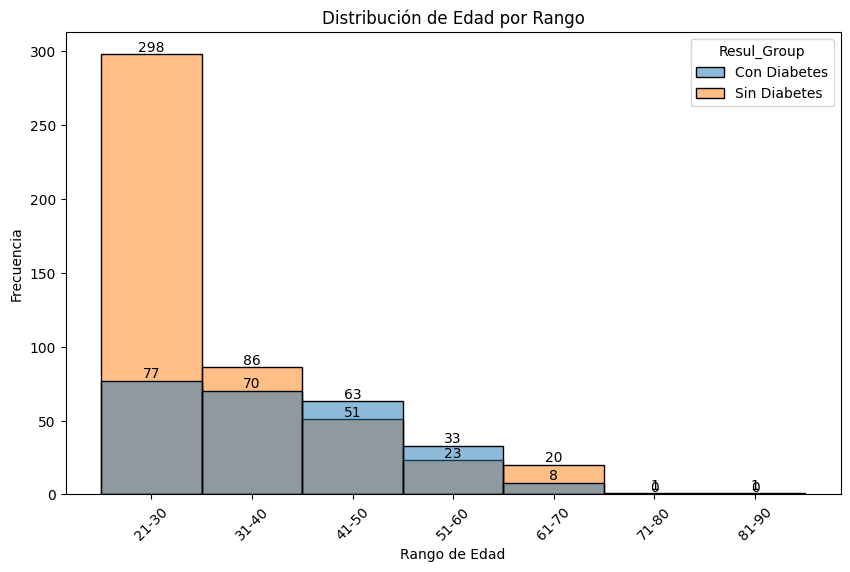

In [209]:

# Definir los límites manualmente
bins = [21, 30, 40, 50, 60, 70, 80, 90]

# Asignamos las etiquetas para cada intervalo
labelsEdad = ["21-30", "31-40", "41-50", "51-60", "61-70", "71-80", "81-90"]

# Crear una nueva columna en el DataFrame que categorice la edad en estos rangos
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labelsEdad, right=False)


# Agrupar por la nueva columna 'Age_Group' y 'Outcome
# Reemplazar los valores de "Outcome" directamente con "No Diabetes" y "Diabetes"
df['Resul_Group'] = df['Outcome'].replace({0: 'Sin Diabetes', 1: 'Con Diabetes'})


# Graficar el histograma, utilizando la nueva columna 'Resul_Group' para el hue
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df, x="Age_Group", stat="count", discrete=True, hue='Resul_Group')

# Título y etiquetas
plt.title("Distribución de Edad por Rango")
plt.xlabel("Rango de Edad")
plt.ylabel("Frecuencia")

# Agregar las frecuencias encima de cada barra
for container in ax.containers:
    ax.bar_label(container)

# Rotar las etiquetas para mejor legibilidad
plt.xticks(rotation=45)


# Mostrar gráfico
plt.show()

Observamos analíticamente las cantidades agrupadas del campo "Age", que existen en la nueva columna "Age_Group".

In [180]:
df["Age_Group"].value_counts()

,count
Age_Group,
21-30,375
31-40,156
41-50,114
51-60,56
61-70,28
71-80,1
81-90,1


#Observamos 3 cosas:
 1. Una mayor cantidad de casos con Edades entre 21 y 30 años (375 casos) lo que representa un 79.5% del total. Sin embargo, solo el 20,5% tienen diabetes.
 2. Si nos centramos en la cantidad de casos con diabetes, en la muestra que tenemos dentro del rango de edad entre 31 y 40 años (156 casos), el 44,8% tiene diabetes.
 3. Mientras que en las muestras de los grupos entre 41 a 50 (55% con diabetes) y 51 a 60 años (59% con diabetes), ambos superan el 50% de casos positivos.


Ahora veremos el campo "BloodPressure" (Presion Arterial), usando un gráfico de *boxplot*, donde lo relacionaremos con el campos "Age (edad).
Ademas, Categorizaremos por el campo "Resul_Group" y de ese modo poder diferenciar entre los grupos con diabetes y sin diabetes.

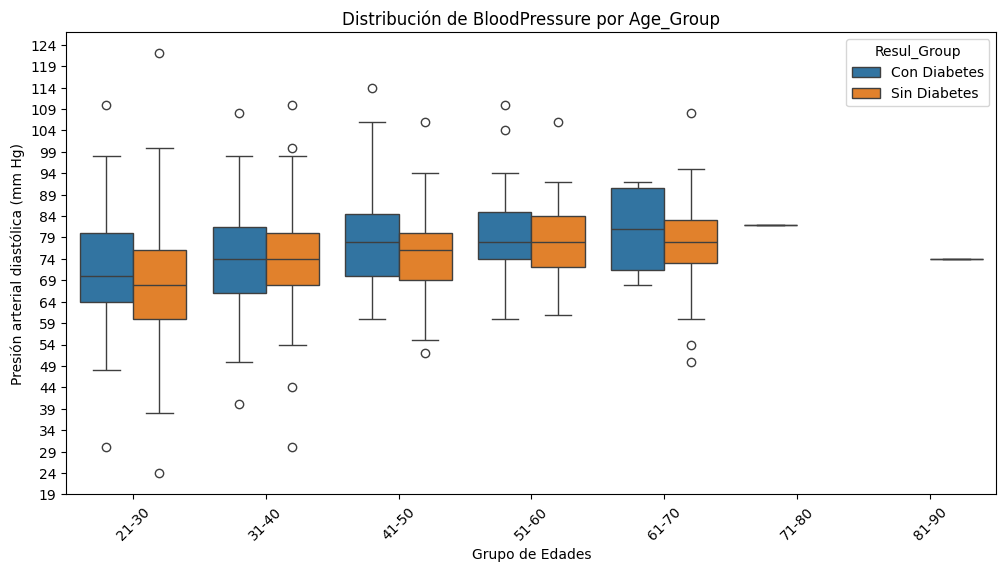

In [182]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Age_Group', y="BloodPressure",hue='Resul_Group')
plt.title('Distribución de BloodPressure por Age_Group')
plt.xlabel('Grupo de Edades')
plt.ylabel('Presión arterial diastólica (mm Hg)')

# Modificar los valores del eje Y para segmentarlo en intervalos de 5
plt.yticks(range(int(df['BloodPressure'].min())-5, int(df['BloodPressure'].max())+5, 5))

# Rotar las etiquetas para mejor legibilidad
plt.xticks(rotation=45)
plt.show()

Observamos los valores estadísticos del campo "BloodPressure", con el metodo describe()

In [183]:
df.BloodPressure.describe().round(0)

,BloodPressure
count,731.0
mean,72.0
std,12.0
min,24.0
25%,64.0
50%,72.0
75%,80.0
max,122.0


Realizamos una grafica donde realizamos agrupamientos según la edad

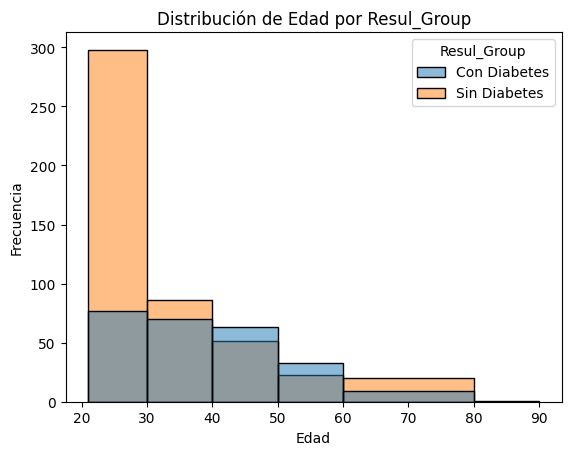

In [189]:
bins=[21,30,40,50,60,80,90]
sns.histplot(data=df, x="Age", hue="Resul_Group", bins=bins)
plt.title("Distribución de Edad por Resul_Group")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

\Realizamos una Grafica para comparar Edad vs DiabetesPedigreeFunction (Menores de 40 años)

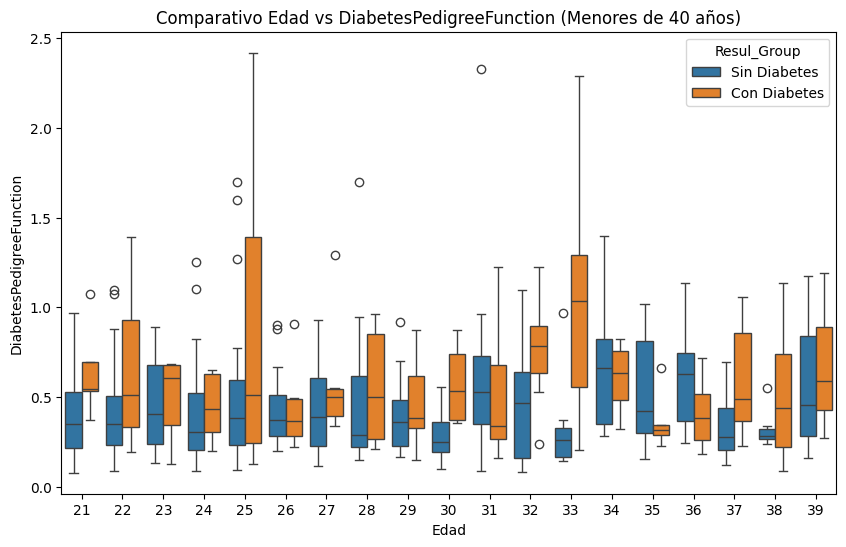

In [198]:
# Filtrar el DataFrame para incluir solo personas menores de 40 años
df_menores_40 = df[df['Age'] < 40]

# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='DiabetesPedigreeFunction', hue='Resul_Group', data=df_menores_40)
plt.title('Comparativo Edad vs DiabetesPedigreeFunction (Menores de 40 años)')
plt.ylabel('DiabetesPedigreeFunction')
plt.xlabel('Edad')


plt.show()

Realizamos una Grafica para comparar Edad vs DiabetesPedigreeFunction (de 40 años o mas y menores a 60 años)

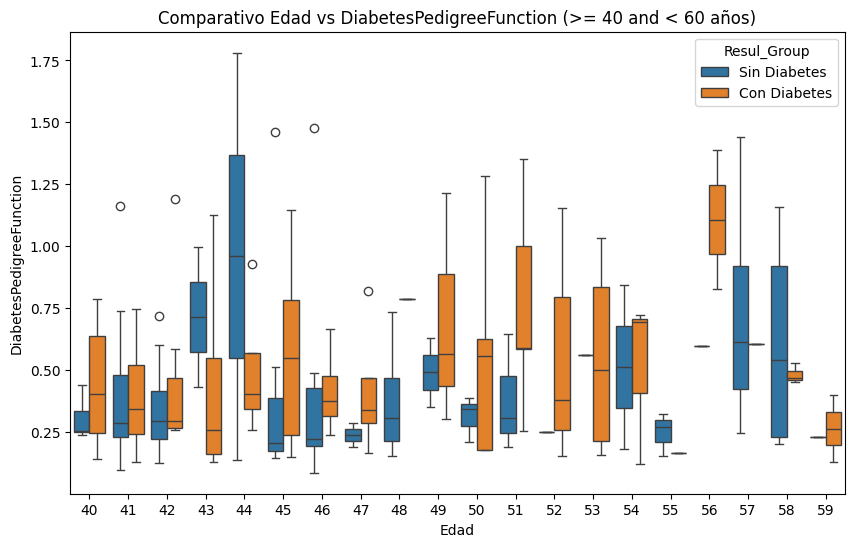

In [200]:
# Filtrar el DataFrame para incluir solo personas mayores de 40 años y menores de 60 años
df_Mayores_40 = df[(df['Age'] >= 40) & (df['Age'] < 60)]

# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='DiabetesPedigreeFunction', hue='Resul_Group', data=df_Mayores_40)
plt.title('Comparativo Edad vs DiabetesPedigreeFunction (>= 40 and < 60 años)')
plt.ylabel('DiabetesPedigreeFunction')
plt.xlabel('Edad')

plt.show()

# Filtrar el DataFrame para incluir solo personas mayores de 60 años y menores de 90 años

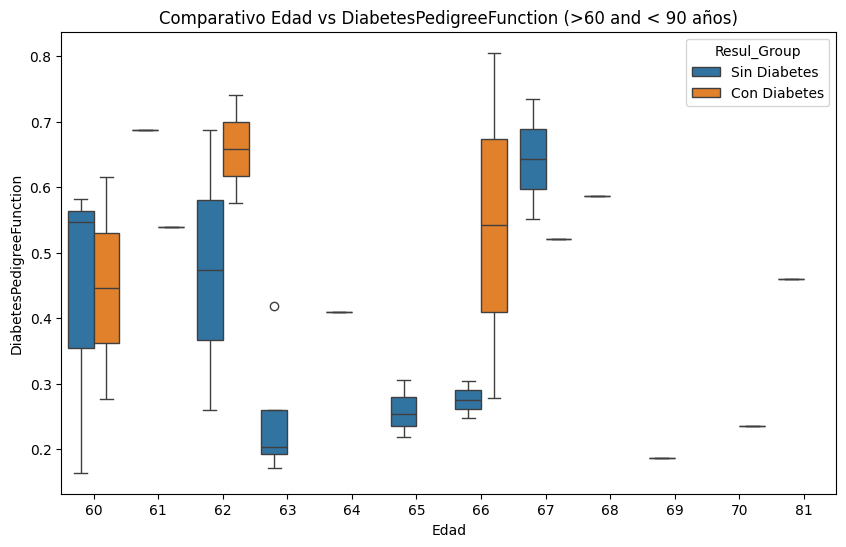

In [199]:
# Filtrar el DataFrame para incluir solo personas mayores de 60 años y menores de 90 años
df_Mayores_60 = df[(df['Age'] >= 60) & (df['Age'] < 90)]

# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='DiabetesPedigreeFunction', hue='Resul_Group', data=df_Mayores_60)
plt.title('Comparativo Edad vs DiabetesPedigreeFunction (>60 and < 90 años)')
plt.ylabel('DiabetesPedigreeFunction')
plt.xlabel('Edad')

plt.show()

Verificamos cono la funcion describe() los valores estadisticos del campo "DiabetesPedigreeFunction"

In [195]:
df.DiabetesPedigreeFunction.describe().round(2)

,DiabetesPedigreeFunction
count,731.00
mean,0.47
std,0.33
min,0.08
25%,0.24
50%,0.38
75%,0.63
max,2.42


# Generamos una gráfica de boxplot para poder ver la relacion entre el campo Age y BMI, considerando si tienen o no diabetes.
#Hacemos una muestra de los menores de 30 años

<ipython-input-213-2be5f406c28d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BMI_Group'] = pd.cut(df['BMI'], bins=binsBMI, labels=labelsBMI, right=False)


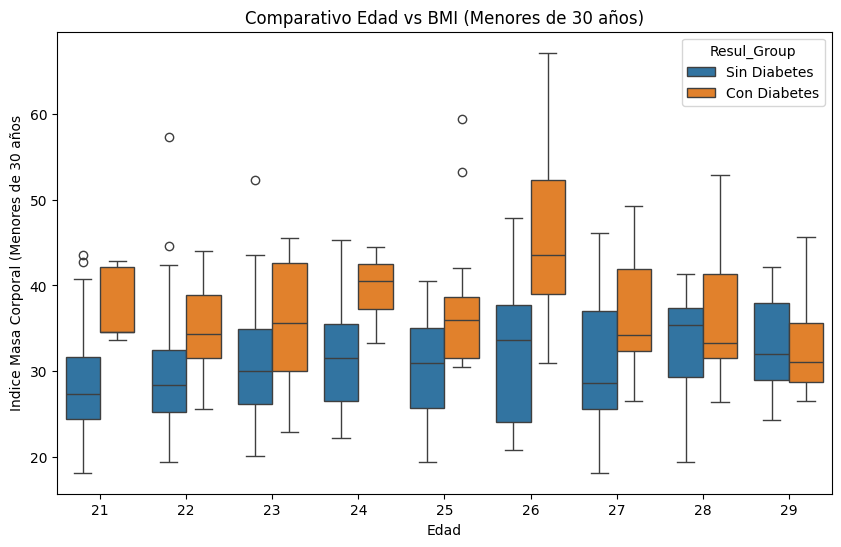

In [213]:
#Creamos el Df nuevo con registros que cumplan la condición
df_menores_30 = df[df['Age'] < 30]

# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='BMI', hue='Resul_Group', data=df_menores_30)
plt.title('Comparativo Edad vs BMI (Menores de 30 años)')
plt.ylabel('Indice Masa Corporal (Menores de 30 años')
plt.xlabel('Edad')

plt.show()

In [ ]:
df_menores_30.Glucose.mean().round(2)

np.float64(113.99)

#Con una gráfica de Barra observamos agruponado los valores del campo BMI, según lo inestigamos y plasmamos al comienzo del modelo, para definir las categorias de 'Bajo Peso <18.5', 'Peso Normal <25', 'Sobrepeso <30', 'Obesidad Grado 1 <35', 'Obesidad Grado 2 <39', 'Obesidad Grado 3 (Mórbida)'

<ipython-input-216-9d16b3661edf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BMI_Group'] = pd.cut(df['BMI'], bins=binsBMI, labels=labelsBMI, right=False)


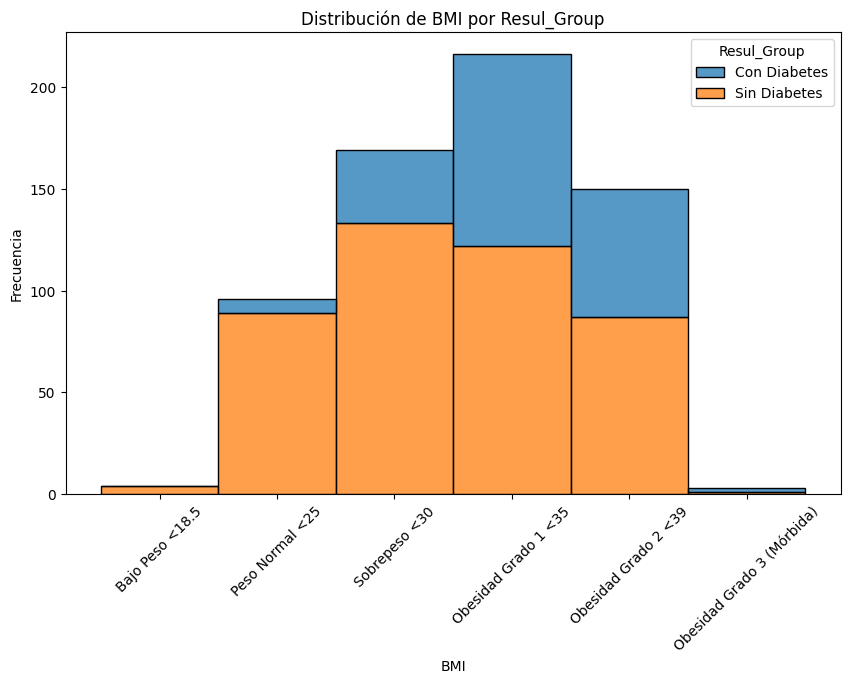

In [216]:


# Creamos un campo nuevo en el DataFrame (df) con el
binsBMI = [0, 18.5, 24.9, 29.9, 34.9, 39.9, 40]
labelsBMI=["Bajo Peso <18.5", "Peso Normal <25", "Sobrepeso <30", "Obesidad Grado 1 <35", "Obesidad Grado 2 <39", "Obesidad Grado 3 (Mórbida)"]
df['BMI_Group'] = pd.cut(df['BMI'], bins=binsBMI, labels=labelsBMI, right=False)


# Graficar la distribución de categorías por Resul_Group
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='BMI_Group', hue='Resul_Group', multiple='stack', stat='count')
plt.title("Distribución de BMI por Resul_Group")
plt.xlabel("BMI")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()


#Vemos la frecuencia en el campo BMI_Group, pero de los casos con diabetes.

In [232]:
df.loc[df['Outcome']==1,'BMI_Group'].value_counts()

,count
BMI_Group,
Obesidad Grado 1 <35,94
Obesidad Grado 2 <39,63
Sobrepeso <30,36
Peso Normal <25,7
Obesidad Grado 3 (Mórbida),2
Bajo Peso <18.5,0


#Vemos la frecuencia en el campo BMI_Group, pero de los casos sin diabetes.

In [233]:
df.loc[df['Outcome']==0,'BMI_Group'].value_counts()

,count
BMI_Group,
Sobrepeso <30,133
Obesidad Grado 1 <35,122
Peso Normal <25,89
Obesidad Grado 2 <39,87
Bajo Peso <18.5,4
Obesidad Grado 3 (Mórbida),1


#Comparamos los campos de "Glucose" y "BMI" (BMI_Group)

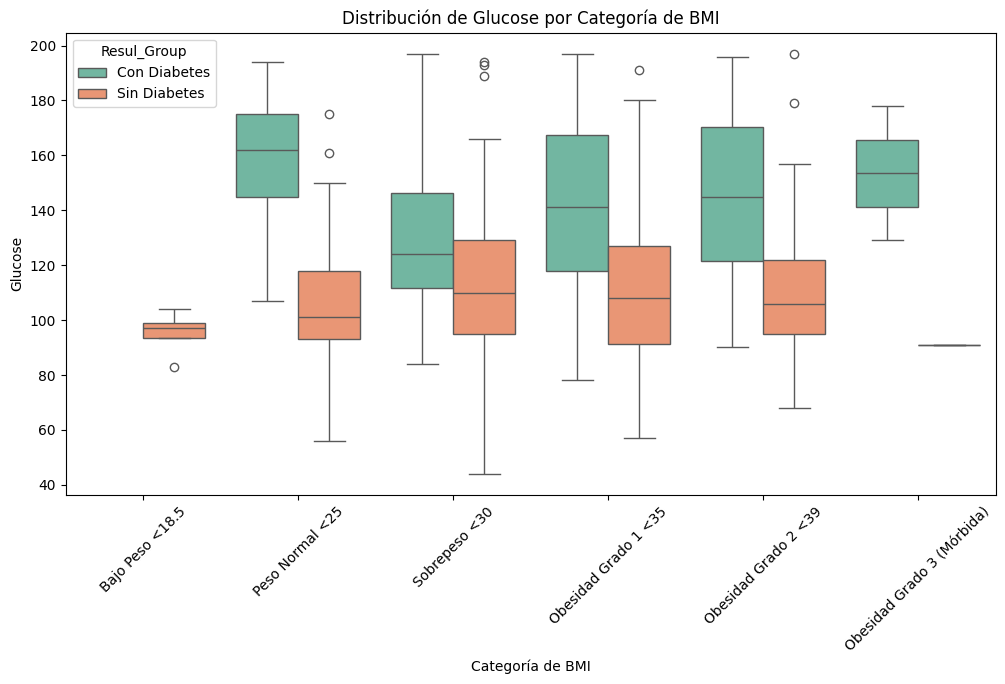

In [218]:

# Crear el boxplot
plt.figure(figsize=(12, 6))  # Ajustar el tamaño de la figura
sns.boxplot(data=df, x='BMI_Group', y='Glucose', hue='Resul_Group', palette='Set2')
plt.title("Distribución de Glucose por Categoría de BMI")
plt.xlabel("Categoría de BMI")
plt.ylabel("Glucose")
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad

plt.show()


Hacemo un control a los valores estadísticos del campo "Pregnancies"

In [222]:
df['Pregnancies'].describe()

,Pregnancies
count,731.000000
mean,3.868673
std,3.370580
min,0.000000
25%,1.000000
50%,3.000000
75%,6.000000
max,17.000000


#Genereamos un df y un campo calculado para medir el porsentaje de diabetes por embarazos.

#Mostramos en una gráfica de lineas ésta tendencia.

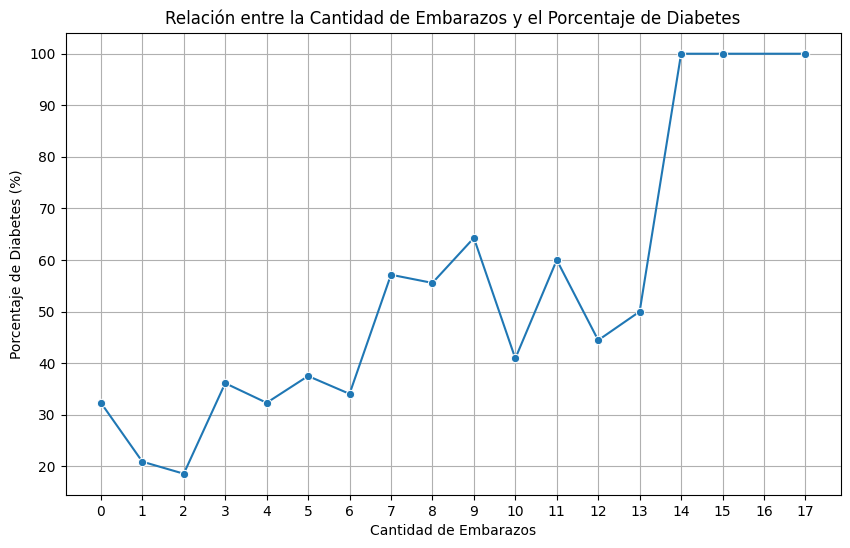

In [223]:

# Agrupar por el número de embarazos y calcular el porcentaje de diabetes
grouped_data = df.groupby('Pregnancies')['Outcome'].mean().reset_index()
grouped_data['Diabetes Percentage'] = grouped_data['Outcome'] * 100

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data, x='Pregnancies', y='Diabetes Percentage', marker='o')
plt.title('Relación entre la Cantidad de Embarazos y el Porcentaje de Diabetes')
plt.xlabel('Cantidad de Embarazos')
plt.ylabel('Porcentaje de Diabetes (%)')
plt.xticks(range(0, grouped_data['Pregnancies'].max() + 1))  # Mostrar todos los valores de embarazos
plt.grid()
plt.show()


#Mostramos en una gráfica el Porcentaje de Diabetes por Número de Embarazos y Grupo de Edad (21-29 años)

<ipython-input-227-eba3c08d4ad6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)
<ipython-input-227-eba3c08d4ad6>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['Pregnancies', 'Age Group'])['Outcome'].mean().reset_index()
<ipython-input-227-eba3c08d4ad6>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=filtered_data, x='Pregnancies', y='Diabetes Percentage', hue='Age Group', ci=None)


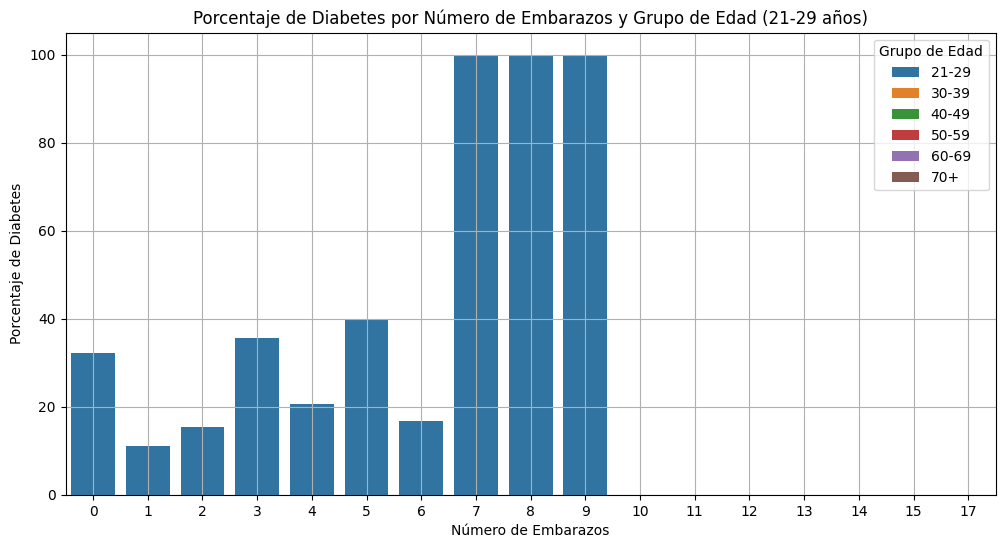

In [227]:
#Creamos un campo ("Age Group) en el df que va tener la agrupacion de edades

bins = [21, 29, 39, 49, 59, 69, 100]  # Definimos los límites de los intervalos
labels = ['21-29', '30-39', '40-49', '50-59', '60-69', '70+']  # Definimos las etiquetas para cada intervalo
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)  # Creamos la nueva columna 'Age Group' con las etiquetas correspondientes


# Agrupamos por 'Pregnancies' y 'Age Group', y calculamos el promedio de 'Outcome'.
grouped_data = df.groupby(['Pregnancies', 'Age Group'])['Outcome'].mean().reset_index()

# Calculamos el porcentaje de diabetes.
grouped_data['Diabetes Percentage'] = grouped_data['Outcome'] * 100

# Filtramos solo los grupos de edad que queremos mostrar, por ejemplo, los de 21-29
filtered_data = grouped_data[grouped_data['Age Group'].isin(['21-29'])]

# Visualizamos los resultados con un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_data, x='Pregnancies', y='Diabetes Percentage', hue='Age Group', ci=None)
plt.title('Porcentaje de Diabetes por Número de Embarazos y Grupo de Edad (21-29 años)')
plt.ylabel('Porcentaje de Diabetes')
plt.xlabel('Número de Embarazos')
plt.legend(title='Grupo de Edad')
plt.grid()
plt.show()
